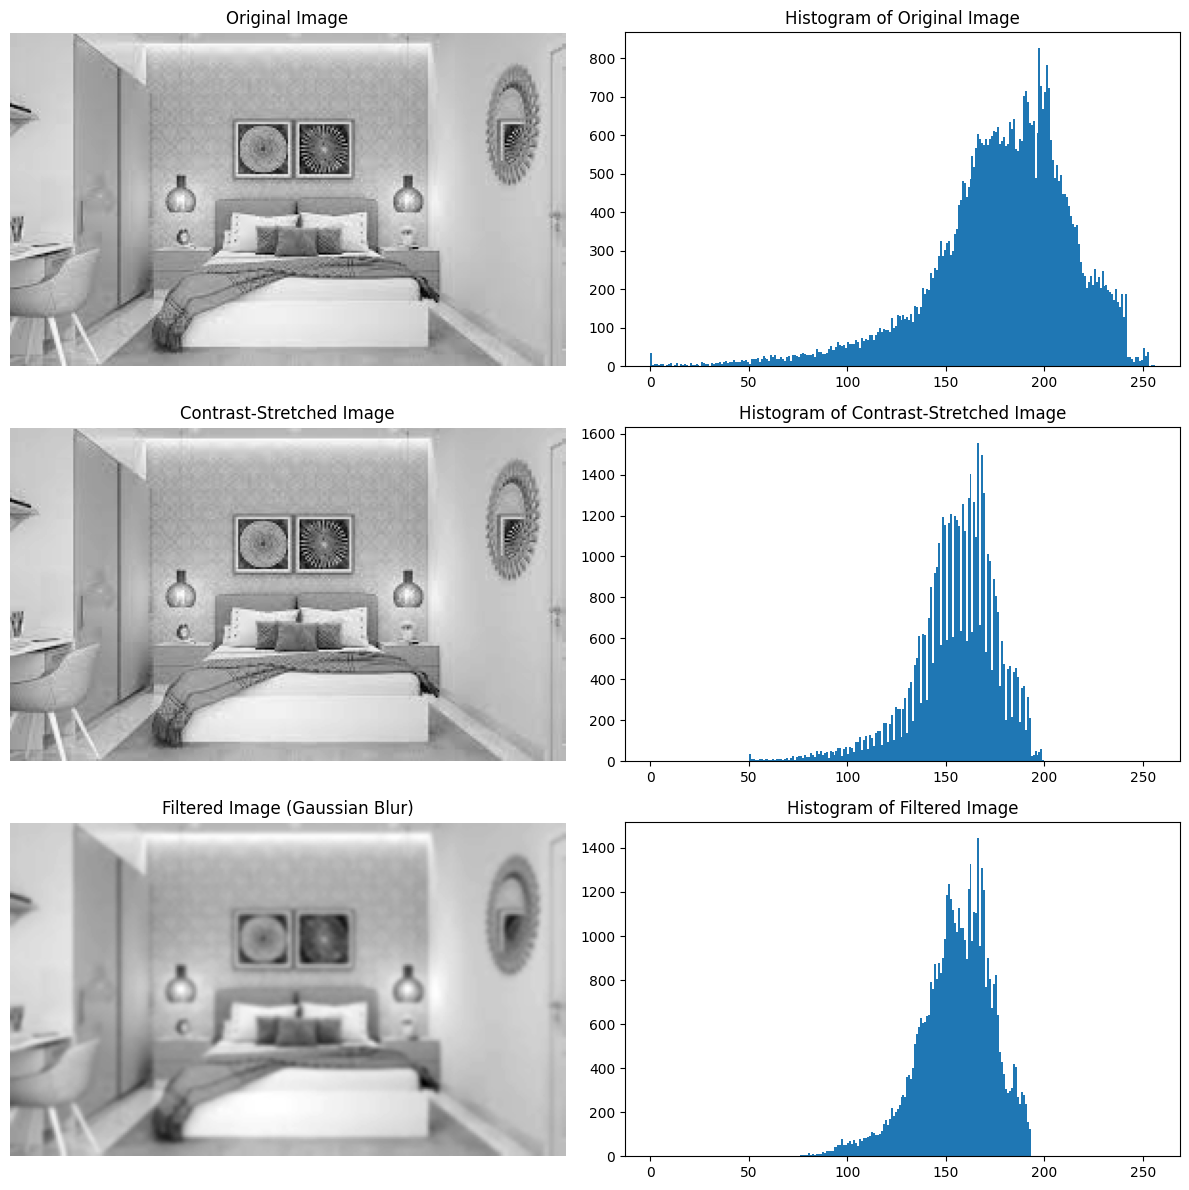

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('img1.jpeg', cv2.IMREAD_GRAYSCALE)

# 1. Contrast Stretching
# Define the minimum and maximum intensity values for stretching
min_intensity, max_intensity = 50, 200

# Apply contrast stretching
stretched_image = cv2.normalize(image, None, alpha=min_intensity, beta=max_intensity, norm_type=cv2.NORM_MINMAX)

# 2. Linear Filtering (Applying a Gaussian filter for smoothing)
# Define the kernel size and apply a Gaussian filter
filtered_image = cv2.GaussianBlur(stretched_image, (5, 5), 0)

# Plotting the Original, Contrast-Stretched, and Filtered Images with Histograms
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Original Image and Histogram
axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis('off')
axs[0, 1].hist(image.ravel(), bins=256, range=(0, 256))
axs[0, 1].set_title("Histogram of Original Image")

# Contrast-Stretched Image and Histogram
axs[1, 0].imshow(stretched_image, cmap='gray')
axs[1, 0].set_title("Contrast-Stretched Image")
axs[1, 0].axis('off')
axs[1, 1].hist(stretched_image.ravel(), bins=256, range=(0, 256))
axs[1, 1].set_title("Histogram of Contrast-Stretched Image")

# Filtered Image and Histogram
axs[2, 0].imshow(filtered_image, cmap='gray')
axs[2, 0].set_title("Filtered Image (Gaussian Blur)")
axs[2, 0].axis('off')
axs[2, 1].hist(filtered_image.ravel(), bins=256, range=(0, 256))
axs[2, 1].set_title("Histogram of Filtered Image")

# Show all plots
plt.tight_layout()
plt.show()


q2 - taking dataset from tensorflow

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Arun\tensorflow_datasets\horses_or_humans\3.0.0.incompleteA3GYS8\horses_or_humans-train.tfr…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Arun\tensorflow_datasets\horses_or_humans\3.0.0.incompleteA3GYS8\horses_or_humans-test.tfre…

Dataset horses_or_humans downloaded and prepared to C:\Users\Arun\tensorflow_datasets\horses_or_humans\3.0.0. Subsequent calls will reuse this data.
Number of training images: 1027
Number of testing images: 256


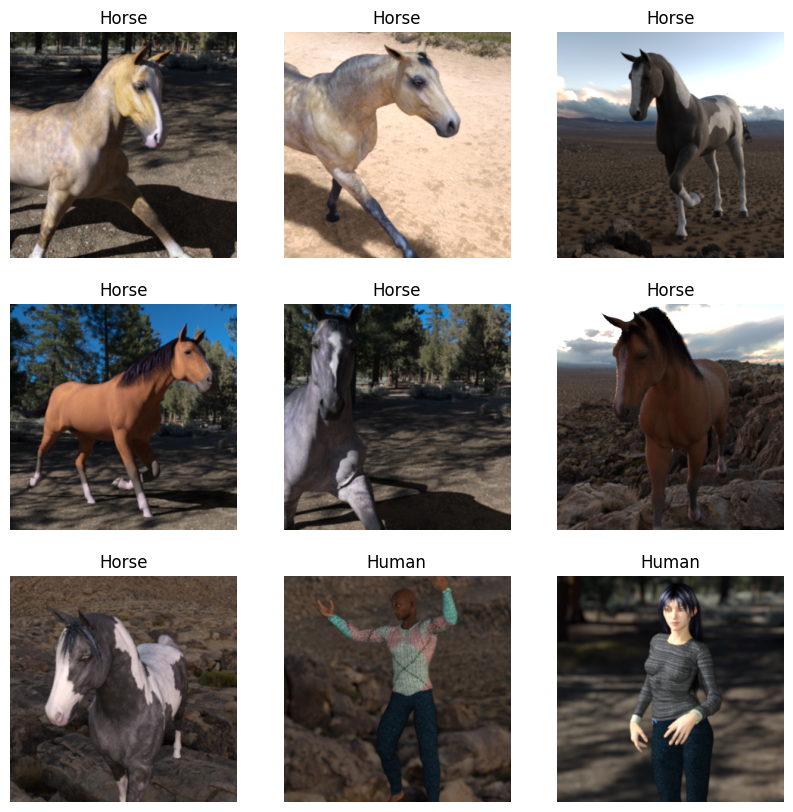

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 25s 488ms/step - accuracy: 0.5322 - loss: 0.6922 - val_accuracy: 0.8633 - val_loss: 0.4831
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 406ms/step - accuracy: 0.6793 - loss: 0.6119 - val_accuracy: 0.8672 - val_loss: 0.3886
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 396ms/step - accuracy: 0.7120 - loss: 0.5648 - val_accuracy: 0.8633 - val_loss: 0.3472
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 397ms/step - accuracy: 0.7495 - loss: 0.5214 - val_accuracy: 0.8516 - val_loss: 0.3406
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 14s 428ms/step - accuracy: 0.7853 - loss: 0.4821 - val_accuracy: 0.8398 - val_loss: 0.3541


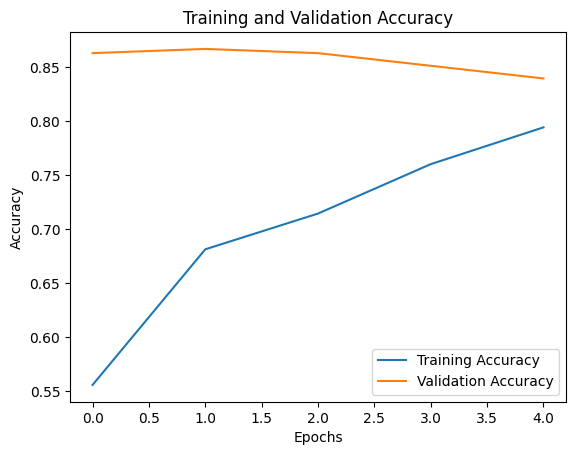

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 360ms/step - accuracy: 0.8655 - loss: 0.3107
Test accuracy: 0.83984375


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# 1. Load the dataset
(ds_train, ds_test), ds_info = tfds.load('horses_or_humans', split=['train', 'test'], with_info=True, as_supervised=True)

# 2. View the number of testing and training images
train_size = ds_info.splits['train'].num_examples
test_size = ds_info.splits['test'].num_examples
print(f"Number of training images: {train_size}")
print(f"Number of testing images: {test_size}")

# 3. Plot some images
def plot_samples(dataset, num_images=9):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title("Horse" if label == 0 else "Human")
    plt.show()

# Display first 9 images from the training dataset
plot_samples(ds_train)

# 4. Normalizing the training data and preprocessing the dataset
def preprocess_data(dataset, batch_size=32):
    def normalize_image(image, label):
        image = tf.image.resize(image, (128, 128))  # Resize images to 128x128
        image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
        return image, label

    return dataset.map(normalize_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_ds = preprocess_data(ds_train)
test_ds = preprocess_data(ds_test)

# 5. Build a Convolutional Neural Network (ResNet) for classification
base_model = tf.keras.applications.ResNet50(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the ResNet layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (horse or human)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train the CNN model and show the accuracy
history = model.fit(train_ds, epochs=5, validation_data=test_ds)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# 7. Show the testing accuracy
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")

q2 - giving path of dataset

Number of horse images: 500
Number of human images: 527


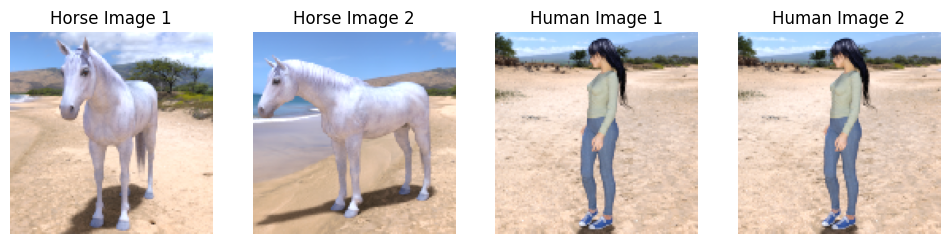

Found 1027 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 49s 1us/step
Epoch 1/20


KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping

# a) Load the dataset
# Assuming the Horse or Human dataset is organized in subfolders (train and validation)

base_dir = r'path to your dataset'

# Define the paths to the horse and human image folders
horse_dir = os.path.join(base_dir, 'horses')
human_dir = os.path.join(base_dir, 'humans')

# Load images from both classes (horse and human)
horse_images = [os.path.join(horse_dir, f) for f in os.listdir(horse_dir)]
human_images = [os.path.join(human_dir, f) for f in os.listdir(human_dir)]

# Show the number of images in each class
print(f"Number of horse images: {len(horse_images)}")
print(f"Number of human images: {len(human_images)}")

# Plot some images from both classes
fig, axes = plt.subplots(1, 4, figsize=(12, 6))

# Display a few horse images
for i, img_path in enumerate(horse_images[:2]):
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img)
    axes[i].imshow(img_array.astype('uint8'))
    axes[i].set_title(f"Horse Image {i+1}")
    axes[i].axis('off')

# Display a few human images
for i, img_path in enumerate(human_images[:2]):
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img)
    axes[i+2].imshow(img_array.astype('uint8'))
    axes[i+2].set_title(f"Human Image {i+1}")
    axes[i+2].axis('off')

plt.show()

# Image Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Set up data generators for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

# Define the CNN model (using ResNet for transfer learning)
model = Sequential([
    ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=2,
    validation_data=train_generator,
    validation_steps=50,
    callbacks=[early_stopping]
)

# Show the training and testing accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()
